# Importing Data

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [4]:
houses = pd.read_csv('/Users/merlesteffen/Documents/GitHub/HousingPrices/Data/housing-classification-iter-0-2.csv')

# Train-Test Split

In [5]:
X = houses.drop(columns='Expensive')
y = houses['Expensive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

# Pipelines

This pipeline first handles missing values and then creared a decision tree output.

In [6]:
# 1. initialize transformers & model
imputer = SimpleImputer()
scaler = MinMaxScaler()
dtree = DecisionTreeClassifier(random_state = 42)

# 2. Create a pipeline*
pipe = make_pipeline(imputer, scaler, dtree)

# Cross Validation

Divide training set into equally sized chunks and run different parameter son those so called FOLDS to configer the optimum.

## Ramdomized Grid Search CV

Use it to find a starting point and refine your param_grid to find the optimal model faster.

In [46]:
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "minmaxscaler__feature_range": [(0,1), (0,2)],  # you can customize this range as needed
    "minmaxscaler__clip": [True, False],  # optional, if you want to include it
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [47]:

search = RandomizedSearchCV(
    pipe,
    param_grid,
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [48]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('minmaxscaler', MinMaxScaler()),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'decisiontreeclassifier__max_depth': range(2, 14),
                                        'decisiontreeclassifier__min_samples_leaf': range(3, 10),
                                        'minmaxscaler__clip': [True, False],
                                        'minmaxscaler__feature_range': [(0, 1),
                                                                        (0, 2)],
                                        'simpleimputer__strategy': ['mean',
                                                                    'median']},
                   random_state=42, verbose=1)

In [49]:
search.best_params_

{'simpleimputer__strategy': 'mean',
 'minmaxscaler__feature_range': (0, 1),
 'minmaxscaler__clip': False,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__criterion': 'entropy'}

In [50]:
search.best_score_

0.9238211022693781

In [51]:
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9392123287671232

In [52]:
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.934931506849315

Use the best parameters and make the ranges smaller for the true Grid Search.

In [54]:
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "minmaxscaler__feature_range": [(0,1)],  # you can customize this range as needed
    "minmaxscaler__clip": [True, False],  # optional, if you want to include it
    "decisiontreeclassifier__max_depth": range(3, 7),
    "decisiontreeclassifier__min_samples_leaf": range(3, 7),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [55]:
# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

In [56]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(3, 7),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 7),
                         'minmaxscaler__clip': [True, False],
                         'minmaxscaler__feature_range': [(0, 1)],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [57]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 6,
 'minmaxscaler__clip': True,
 'minmaxscaler__feature_range': (0, 1),
 'simpleimputer__strategy': 'mean'}

In [58]:
search.best_score_

0.9272399056881817

In [59]:
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9392123287671232

In [60]:
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9315068493150684

# Visualize Tree

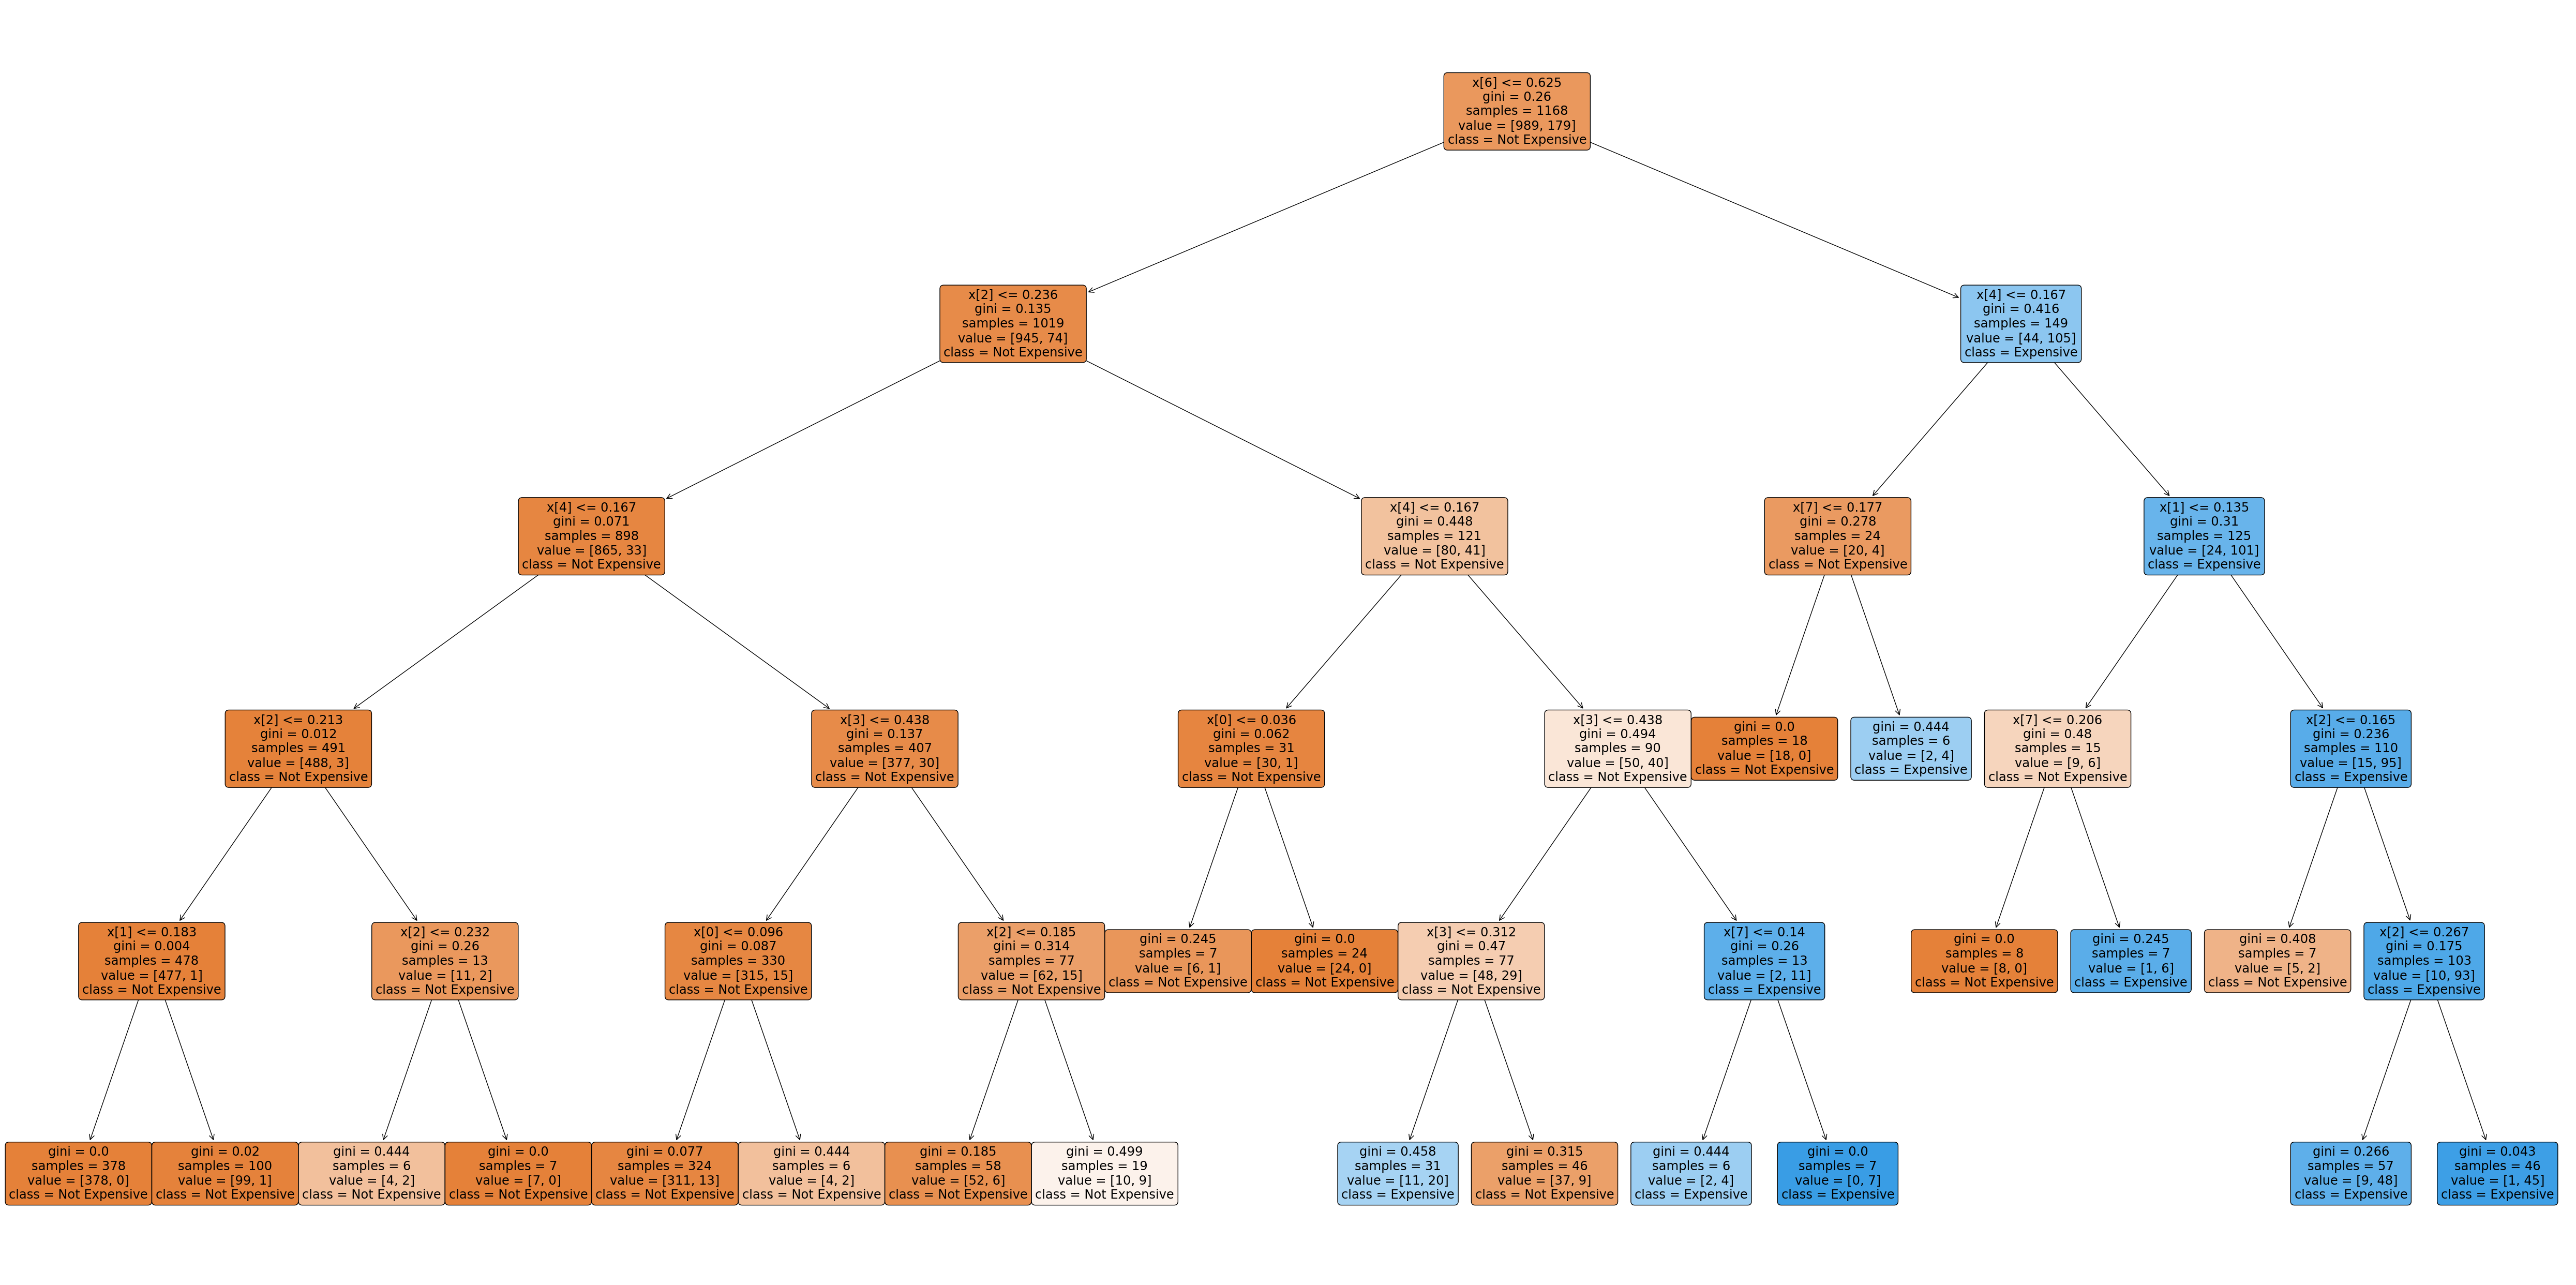

In [61]:
plt.figure(figsize=(64,32))
plot_tree(
    search.best_estimator_['decisiontreeclassifier'],
    filled=True,
    rounded=True,
    class_names=['Not Expensive', 'Expensive']
)
plt.show();

In [40]:
print('This worked!')

This worked!
